In [15]:
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [16]:
df = pd.read_csv('Book1.csv')

#fd['ds'] = pd.to_datetime(fd['ds'], errors='coerce')
df.dtypes


ds    object
y      int64
dtype: object

In [17]:
df.head()

,ds,y
0,2017-06-15,1
1,2017-06-15,1
2,2017-06-15,0
3,2017-06-15,1
4,2017-06-15,0


In [18]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

KeyError: 'Month'

In [19]:
df = df.rename(columns={'Month': 'ds',
                        'Leads': 'y'})

df.head(5)

,ds,y
0,2017-06-15,1
1,2017-06-15,1
2,2017-06-15,0
3,2017-06-15,1
4,2017-06-15,0


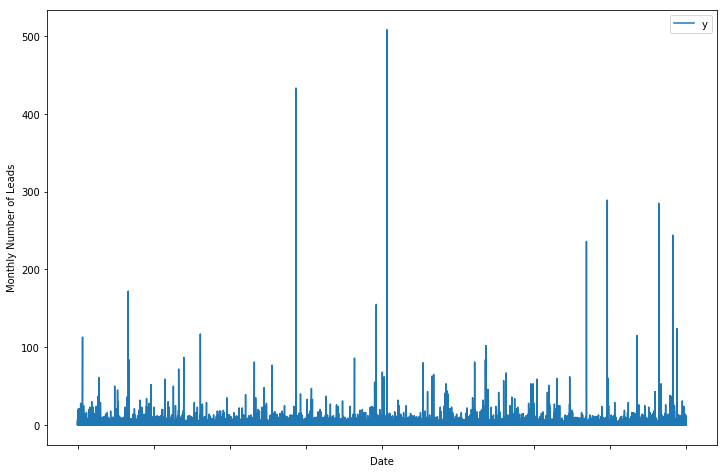

In [20]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Leads')
ax.set_xlabel('Date')

plt.show()

In [21]:
df['cap'] = df.y.max()
df['floor'] = df.y.min()

In [22]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
#my_model = Prophet(interval_width=0.95)

#my_model = Prophet(interval_width=0.95).fit(df).predict(future_dates)
#m = Prophet(seasonality_mode='multiplicative')
#m = Prophet(changepoint_range=0.9)
m = Prophet(growth='logistic', changepoint_prior_scale=0.1,interval_width=0.95)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
#my_model.fit(df)

future = m.make_future_dataframe(periods=50)
future.tail()

,ds
200045,2019-04-02
200046,2019-04-03
200047,2019-04-04
200048,2019-04-05
200049,2019-04-06


In [26]:
#forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)



future = m.make_future_dataframe(periods=60)
future['cap'] = 12 #approx max for last year same period
future['floor'] = df.y.min()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail

<bound method NDFrame.tail of                ds      yhat  yhat_lower  yhat_upper
0      2016-12-31 -0.307383   -5.276220    4.695667
1      2016-12-31 -0.307383   -5.324628    4.480403
2      2016-12-31 -0.307383   -5.235147    4.655806
3      2016-12-31 -0.307383   -5.170930    4.484776
4      2016-12-31 -0.307383   -5.307732    4.766004
5      2016-12-31 -0.307383   -5.285291    4.440761
6      2016-12-31 -0.307383   -5.062212    4.744211
7      2016-12-31 -0.307383   -4.934123    5.156185
8      2016-12-31 -0.307383   -5.098431    3.982040
9      2016-12-31 -0.307383   -5.295876    4.505878
10     2016-12-31 -0.307383   -5.413499    5.333739
11     2016-12-31 -0.307383   -5.404624    4.731821
12     2016-12-31 -0.307383   -5.110840    4.538800
13     2016-12-31 -0.307383   -5.226347    4.759756
14     2016-12-31 -0.307383   -5.280067    4.733956
15     2016-12-31 -0.307383   -5.033842    4.511145
16     2016-12-31 -0.307383   -5.492530    4.388500
17     2016-12-31 -0.307383   -5.1

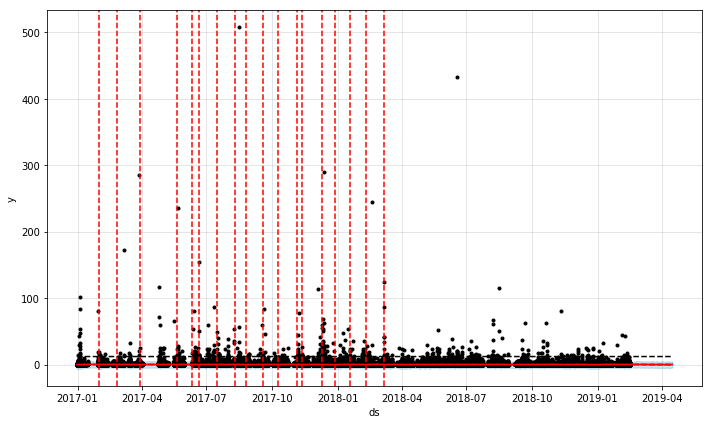

In [27]:
from  fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

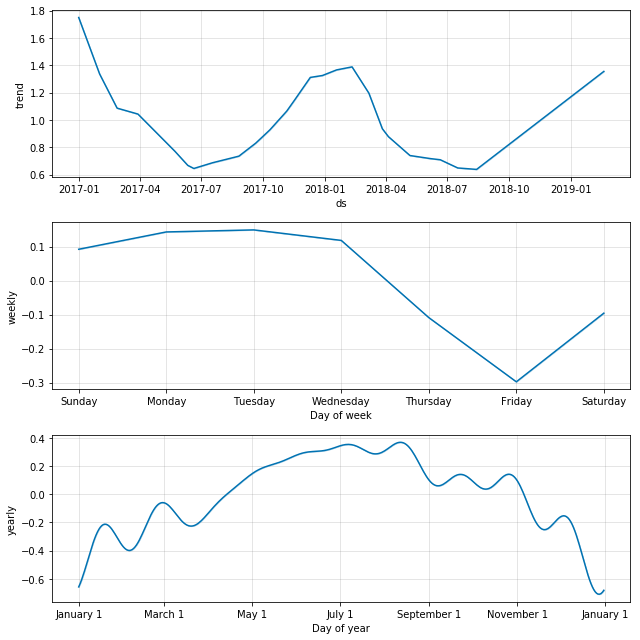

In [38]:
fig2 = m.plot_components(forecast)




INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


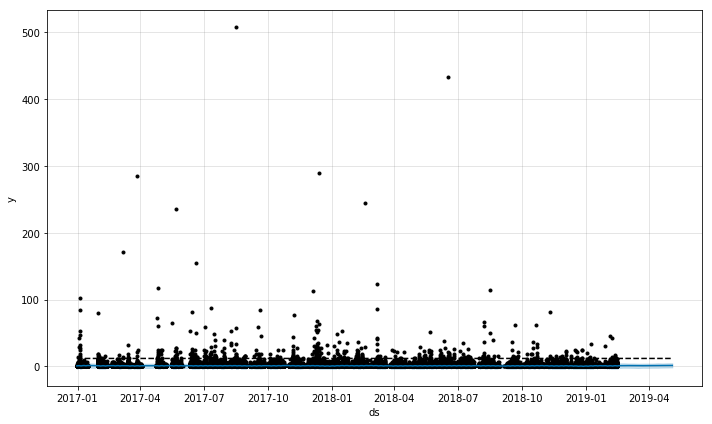

In [12]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

In [14]:
####PREVIOUS TO THIS
future_dates = my_model.make_future_dataframe(periods=3)
future_dates.tail()

NameError: name 'my_model' is not defined

In [21]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
199998,2019-02-15,0.770590,-4.304769,5.885653
199999,2019-02-15,0.770590,-4.534021,5.862784
200000,2019-03-01,1.036123,-3.438088,5.942336
200001,2019-04-01,1.515974,-3.165911,6.503516
200002,2019-05-01,1.883197,-2.902357,6.343109


In [198]:
fd.shape
fd.dtypes


ds    object
y      int64
dtype: object

In [179]:
# fd=fd.loc[:,['NO_OF_WINS']]
# fd.head()


fd['DATE'] = pd.to_datetime(fd['DATE'], errors='coerce')
fd.dtypes

DATE_KEY                         int64
OFFRNG_ID                        int64
GEO_ID                           int64
NO_OF_OPRTNTY_CREATD             int64
NO_OF_WINS                       int64
DATE                    datetime64[ns]
dtype: object

In [180]:
fd.head()
fd.describe()

,DATE_KEY,OFFRNG_ID,GEO_ID,NO_OF_OPRTNTY_CREATD,NO_OF_WINS
count,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000
mean,43119.304455,198.450565,149.65133,1.014345,0.296540
std,211.145413,17.111832,74.25018,2.520661,0.786859
min,42735.000000,178.000000,0.00000,0.000000,0.000000
25%,42947.000000,194.000000,95.00000,1.000000,0.000000
50%,43110.000000,194.000000,168.00000,1.000000,0.000000
75%,43289.000000,194.000000,224.00000,1.000000,0.000000
max,43511.000000,329.000000,299.00000,508.000000,84.000000


In [181]:
# months =pd.date_range('20161231',periods=144,freq='M')
# months
# fd['ds']=months
# fd.head()
# fd.dtypes

In [182]:
months =pd.date_range('20161231',periods=144,freq='M')
months
fd =fd.rename(columns= {"DATE": "ds"})
fd =fd.rename(columns= {"NO_OF_OPRTNTY_CREATD": "y" })
fd =fd.sort_index(axis=1)
fd.head()

,DATE_KEY,GEO_ID,NO_OF_WINS,OFFRNG_ID,ds,y
0,42901,15,1,194,2017-06-15,1
1,42901,46,0,194,2017-06-15,1
2,42901,224,1,194,2017-06-15,0
3,42901,46,0,194,2017-06-15,1
4,42901,224,1,194,2017-06-15,0


In [183]:
fd=fd[(fd['OFFRNG_ID']==190)]

In [184]:
fd=fd.drop('DATE_KEY',axis=1)



In [185]:
fd=fd.drop('GEO_ID',axis=1)

In [186]:
fd=fd.drop('NO_OF_WINS',axis=1)

In [187]:
fd=fd.drop('OFFRNG_ID',axis=1)
fd.head()

,ds,y
67,2017-06-19,1
538,2017-05-25,1
830,2017-09-17,1
1937,2017-12-13,2
2244,2017-04-25,1


In [188]:
per = fd.ds.dt.to_period("D")
data = fd.groupby(per)
data=data.sum()
data.head()


,y
ds,
2016-12-31,0
2017-01-02,2
2017-01-03,1
2017-01-04,2
2017-01-05,4


 my_forecast = Prophet(interval_width=0.95)

In [189]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)
#my_forecast = Prophet(interval_width=0.95)

In [190]:
#my_forecast.fit(fd)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [191]:
forecast_periods = my_forecast.make_future_dataframe(periods=4,include_history=True,freq='M')
forecast_periods.head()

,ds
0,2016-12-31
1,2016-12-31
2,2016-12-31
3,2016-12-31
4,2016-12-31


In [192]:
forecast =my_forecast.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.tail()

,ds,yhat
633,2019-02-13,1.075634
634,2019-02-28,1.175038
635,2019-03-31,0.788609
636,2019-04-30,0.949041
637,2019-05-31,1.040660


In [24]:
my_plot.plot(forecast,uncertainty=True)

NameError: name 'my_plot' is not defined

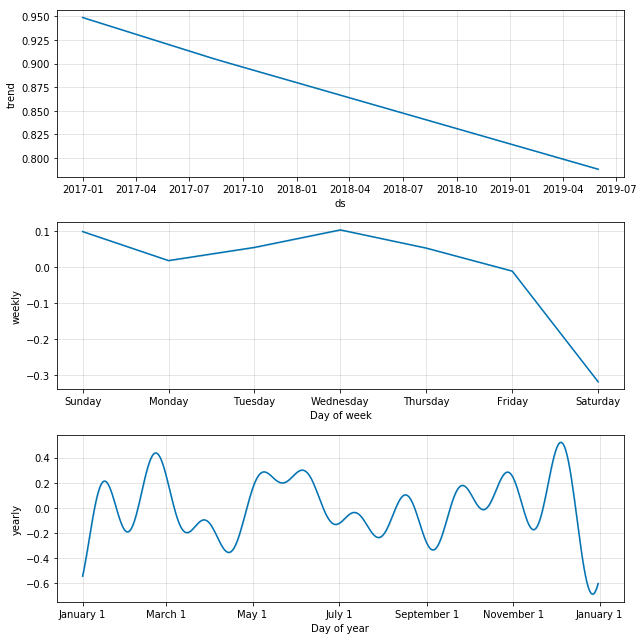

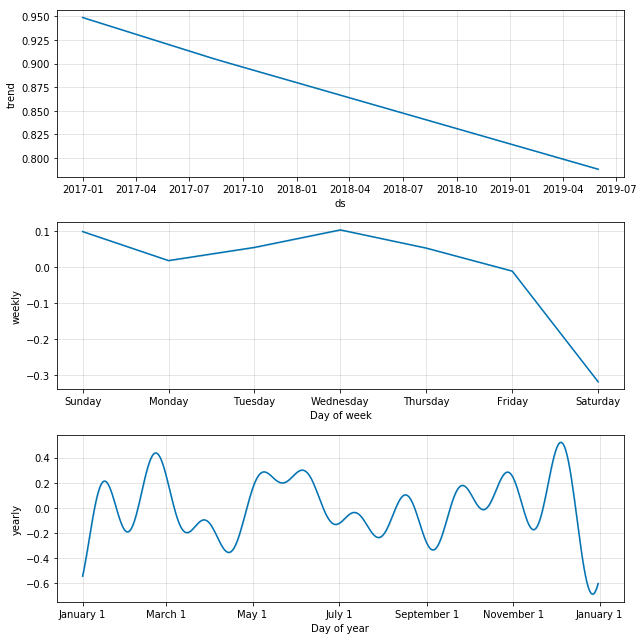

In [194]:
my_forecast.plot_components(forecast)

In [195]:
final_df=pd.merge(forecast1,fd,on='ds',how='inner')
final_df.head()

,ds,yhat,y
0,2016-12-31,0.035876,0
1,2016-12-31,0.035876,0
2,2016-12-31,0.035876,0
3,2016-12-31,0.035876,0
4,2016-12-31,0.035876,0


In [165]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)

0.0

In [166]:
fd.head()

,ds,y
67,2017-06-19,1
538,2017-05-25,1
830,2017-09-17,1
1937,2017-12-13,2
2244,2017-04-25,1


In [167]:
# fd.y=np.log(fd.y)
# fd.head(5)

# fd.replace([np.inf, -np.inf], np.nan)

In [13]:
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(fd)
forecast_periods=my_forecast.make_future_dataframe(periods=20,include_history=True)
forecast_periods
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds','yhat']]
forecast1.head()
my_forecast.plot(forecast,uncertainty=True)


NameError: name 'fd' is not defined

,ds,yhat,y
0,2016-12-31,0.035876,0
1,2016-12-31,0.035876,0
2,2016-12-31,0.035876,0
3,2016-12-31,0.035876,0
4,2016-12-31,0.035876,0


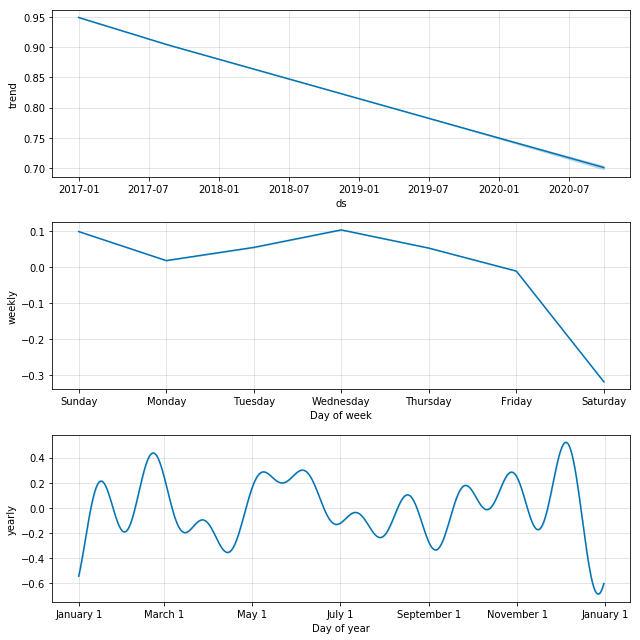

In [169]:
my_forecast.plot_components(forecast)
final_df1=pd.merge(forecast1,fd,on='ds',how='inner')
final_df1.head()

In [170]:
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head()


,ds,yhat,y
0,2016-12-31,1.036527,1.0
1,2016-12-31,1.036527,1.0
2,2016-12-31,1.036527,1.0
3,2016-12-31,1.036527,1.0
4,2016-12-31,1.036527,1.0


In [171]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)

0.0

In [172]:
forecast2=forecast.loc[400:,['ds','yhat']]#,'yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
per1 = fd.ds.dt.to_period("Y")
#forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
#forecast2.yhat_upper=np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat
400,2018-05-08,3.0
401,2018-05-08,3.0
402,2018-05-08,3.0
403,2018-05-08,3.0
404,2018-05-08,3.0
405,2018-05-08,3.0
406,2018-05-09,3.0
407,2018-05-09,3.0
408,2018-05-09,3.0
409,2018-05-09,3.0


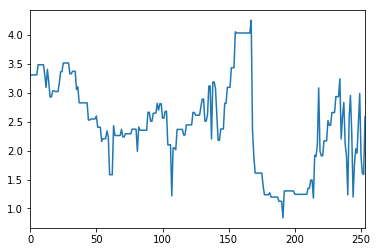

In [173]:
sns.tsplot(forecast2.yhat)
plt.show()